In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

### **Task is to train a classifier to identify type of a particle. There are six particle types: electron, proton, muon, kaon, pion and ghost. Ghost is a particle with other type than the first five or a detector noise.**

### **Different particle types remain different responses in the detector systems or subdetectors. Thre are five systems: tracking system, ring imaging Cherenkov detector (RICH), electromagnetic and hadron calorimeters, and muon system.**


![features](https://raw.githubusercontent.com/hse-aml/hadron-collider-machine-learning/64a81c5fd465f68713dace0d400325cd004d39de/week2/pic/pid.jpg)

### **Tracking System**
***
Calculates the path and momentum of charged particles like proton, electron, kaon, pion.

### **Ring imaging Cherenkov detector (RICH)**
***
Identifies particle type, using momentum and path of particle obtained in Tracking System.

### **Elctromagnetic Calorimeter**
***
It can detect electron and photon. It calculates the energy of electron and photon. Electron and photon are consumed in this chamber.

### **Hadron Calorimeter**
***
It calculates energy of all the other particles. All the particles except muon are consumed within this chamber

### **Muon System**
***
muons are detected in this system. It calculates the energy of muons.

In [2]:
df = pd.read_csv("/Users/mananmehta/Downloads/training.csv")

In [3]:
df.head()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
0,74791.156263,15.0,0.232275,1.0,1.0,3.2,-2.505719,6.604153,1.0,1.929960,...,28.0,1.0,-7.213300,-0.280200,5586.589846,1.0,1.0,10.422315,-2.081143e-07,-24.824400
1,2738.489989,15.0,-0.357748,0.0,1.0,3.2,1.864351,0.263651,1.0,-2.061959,...,32.0,1.0,-0.324317,1.707283,-0.000007,0.0,1.0,43.334935,2.771583e+00,-0.648017
2,2161.409908,17.0,-999.000000,0.0,0.0,-999.0,-999.000000,-999.000000,0.0,-999.000000,...,27.0,0.0,-999.000000,-999.000000,-999.000000,0.0,0.0,-999.000000,-9.990000e+02,-999.000000
3,15277.730490,20.0,-0.638984,0.0,1.0,3.2,-2.533918,-8.724949,1.0,-3.253981,...,36.0,1.0,-35.202221,-14.742319,4482.803707,0.0,1.0,2.194175,-3.070819e+00,-29.291519
4,7563.700195,19.0,-0.638962,0.0,1.0,3.2,-2.087146,-7.060422,1.0,-0.995816,...,33.0,1.0,25.084287,-10.272412,5107.554680,0.0,1.0,0.000015,-5.373712e+00,23.653087


## We have 50 features each having 12,00,000 values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 50 columns):
TrackP                             1200000 non-null float64
TrackNDoFSubdetector2              1200000 non-null float64
BremDLLbeElectron                  1200000 non-null float64
MuonLooseFlag                      1200000 non-null float64
FlagSpd                            1200000 non-null float64
SpdE                               1200000 non-null float64
EcalDLLbeElectron                  1200000 non-null float64
DLLmuon                            1200000 non-null float64
RICHpFlagElectron                  1200000 non-null float64
EcalDLLbeMuon                      1200000 non-null float64
TrackQualitySubdetector2           1200000 non-null float64
FlagPrs                            1200000 non-null float64
DLLelectron                        1200000 non-null float64
DLLkaon                            1200000 non-null float64
EcalE                              1200000 non-

In [5]:
df.describe()

,TrackP,TrackNDoFSubdetector2,BremDLLbeElectron,MuonLooseFlag,FlagSpd,SpdE,EcalDLLbeElectron,DLLmuon,RICHpFlagElectron,EcalDLLbeMuon,...,TrackNDoF,RICHpFlagMuon,RICH_DLLbeKaon,RICH_DLLbeElectron,HcalE,MuonFlag,FlagMuon,PrsE,RICH_DLLbeMuon,RICH_DLLbeProton
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,...,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,1.614162e+04,1.475170e+01,-2.077315e+02,1.908400e-01,8.531908e-01,-1.443849e+02,-1.828275e+02,-1.266902e+01,9.514050e-01,-1.830022e+02,...,2.942221e+01,9.187425e-01,-5.183805e+01,-5.103860e+01,2.900030e+03,1.662333e-01,8.209933e-01,-1.338948e+02,-4.919965e+01,-5.223401e+01
std,2.790366e+04,4.038073e+00,4.054632e+02,3.929634e-01,3.539157e-01,3.545035e+02,3.854803e+02,1.049158e+02,2.150199e-01,3.853958e+02,...,6.029159e+00,2.732303e-01,2.153209e+02,2.150846e+02,7.686446e+03,3.722901e-01,3.833581e-01,3.628977e+02,2.147605e+02,2.152330e+02
min,1.115380e+03,1.000000e+00,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,...,7.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,0.000000e+00,-9.990000e+02,-9.990000e+02,-9.990000e+02
25%,4.137650e+03,1.300000e+01,-6.389485e-01,0.000000e+00,1.000000e+00,0.000000e+00,-3.000639e+00,-5.711142e+00,1.000000e+00,-3.367626e+00,...,2.600000e+01,1.000000e+00,-1.469941e+01,-1.310509e+01,-1.438680e-05,0.000000e+00,1.000000e+00,9.222748e-06,-4.503331e+00,-1.619484e+01
50%,8.069835e+03,1.600000e+01,-5.329026e-01,0.000000e+00,1.000000e+00,3.200000e+00,-2.321410e+00,-1.988139e+00,1.000000e+00,-1.956064e+00,...,3.000000e+01,1.000000e+00,-1.207258e-06,-2.356098e+00,5.780127e+02,0.000000e+00,1.000000e+00,2.468449e+00,-4.697510e-01,-2.928758e-06
75%,1.750157e+04,1.800000e+01,-5.933819e-02,0.000000e+00,1.000000e+00,3.200000e+00,5.918621e-01,1.669210e+00,1.000000e+00,4.339380e-01,...,3.400000e+01,1.000000e+00,8.465107e+00,1.674137e+00,3.046122e+03,0.000000e+00,1.000000e+00,8.502449e+00,1.300086e+00,8.922095e+00
max,4.750951e+06,3.000000e+01,4.791513e+00,1.000000e+00,1.000000e+00,3.200000e+00,4.341298e+00,1.471079e+01,1.000000e+00,2.153017e+00,...,5.200000e+01,1.000000e+00,1.588015e+02,1.861542e+02,8.682200e+05,1.000000e+00,1.000000e+00,2.805800e+02,1.428335e+02,1.462984e+02


# Description of features

- ID - id value for tracks (presents only in the test file for the submitting purposes)
- Label - string valued observable denoting particle types. Can take values "Electron", "Muon", "Kaon", "Proton", "Pion" and "Ghost". This column is absent in the test file.
- FlagSpd - flag (0 or 1), if reconstructed track passes through Spd
- FlagPrs - flag (0 or 1), if reconstructed track passes through Prs
- FlagBrem - flag (0 or 1), if reconstructed track passes through Brem
- FlagEcal - flag (0 or 1), if reconstructed track passes through Ecal
- FlagHcal - flag (0 or 1), if reconstructed track passes through Hcal
- FlagRICH1 - flag (0 or 1), if reconstructed track passes through the first RICH detector
- FlagRICH2 - flag (0 or 1), if reconstructed track passes through the second RICH detector
- FlagMuon - flag (0 or 1), if reconstructed track passes through muon stations (Muon)
- SpdE - energy deposit associated to the track in the Spd
- PrsE - energy deposit associated to the track in the Prs
- EcalE - energy deposit associated to the track in the Hcal
- HcalE - energy deposit associated to the track in the Hcal
- PrsDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Prs
- BremDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Brem
- TrackP - particle momentum
- TrackPt - particle transverse momentum
- TrackNDoFSubdetector1  - number of degrees of freedom for track fit using hits in the tracking sub-detector1
- TrackQualitySubdetector1 - chi2 quality of the track fit using hits in the tracking sub-detector1
- TrackNDoFSubdetector2 - number of degrees of freedom for track fit using hits in the tracking sub-detector2
- TrackQualitySubdetector2 - chi2 quality of the track fit using hits in the  tracking sub-detector2
- TrackNDoF - number of degrees of freedom for track fit using hits in all tracking sub-detectors
- TrackQualityPerNDoF - chi2 quality of the track fit per degree of freedom
- TrackDistanceToZ - distance between track and z-axis (beam axis)
- Calo2dFitQuality - quality of the 2d fit of the clusters in the calorimeter 
- Calo3dFitQuality - quality of the 3d fit in the calorimeter with assumption that particle was electron
- EcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Ecal
- EcalDLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from Ecal
- EcalShowerLongitudinalParameter - longitudinal parameter of Ecal shower
- HcalDLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from Hcal
- HcalDLLbeMuon - delta log-likelihood for a particle candidate to be using information from Hcal
- RICHpFlagElectron - flag (0 or 1) if momentum is greater than threshold for electrons to produce Cherenkov light
- RICHpFlagProton - flag (0 or 1) if momentum is greater than threshold for protons to produce Cherenkov light
- RICHpFlagPion - flag (0 or 1) if momentum is greater than threshold for pions to produce Cherenkov light
- RICHpFlagKaon - flag (0 or 1) if momentum is greater than threshold for kaons to produce Cherenkov light
- RICHpFlagMuon - flag (0 or 1) if momentum is greater than threshold for muons to produce Cherenkov light
- RICH_DLLbeBCK  - delta log-likelihood for a particle candidate to be background using information from RICH
- RICH_DLLbeKaon - delta log-likelihood for a particle candidate to be kaon using information from RICH
- RICH_DLLbeElectron - delta log-likelihood for a particle candidate to be electron using information from RICH
- RICH_DLLbeMuon - delta log-likelihood for a particle candidate to be muon using information from RICH
- RICH_DLLbeProton - delta log-likelihood for a particle candidate to be proton using information from RICH
- MuonFlag - muon flag (is this track muon) which is determined from muon stations
- MuonLooseFlag muon flag (is this track muon) which is determined from muon stations using looser criteria
- MuonLLbeBCK - log-likelihood for a particle candidate to be not muon using information from muon stations
- MuonLLbeMuon - log-likelihood for a particle candidate to be muon using information from muon stations
- DLLelectron - delta log-likelihood for a particle candidate to be electron using information from all subdetectors
- DLLmuon - delta log-likelihood for a particle candidate to be muon using information from all subdetectors
- DLLkaon - delta log-likelihood for a particle candidate to be kaon using information from all subdetectors
- DLLproton - delta log-likelihood for a particle candidate to be proton using information from all subdetectors
- GhostProbability - probability for a particle candidate to be ghost track. This variable is an output of classification model used in the tracking algorithm

### Define training features

The following set of features describe particle responses in the detector systems:

![features](https://raw.githubusercontent.com/hse-aml/hadron-collider-machine-learning/master/week2/pic/features.jpeg)



# We have 6 labels

In [6]:
print(df.Label.unique())

['Muon' 'Ghost' 'Pion' 'Proton' 'Kaon' 'Electron']


# Coverting Labels to one_hot labels for classification

In [7]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
y = df['Label'].values
y = np.reshape(y,(-1,1))
y = oh.fit_transform(y).toarray()

In [8]:
print(y.shape)

(1200000, 6)


## separating features data

In [9]:
X = df[list(set(df.columns) - {'Label','class'})]

# cleaned data

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(X)

In [11]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(data_scaled,y, train_size=0.80)

/Users/mananmehta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.80)

/Users/mananmehta/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [13]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

960000 960000
240000 240000


In [14]:
X_train = X_train.values
X_test = X_test.values

# Training neural network to classify Particles

In [15]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam

#opt = Adam(lr = 0.003)
model = Sequential()
model.add(Dense(32,activation = 'relu',input_shape = (49,)))
#model.add(Dense(8,activation = 'relu'))

model.add((Dense(6,activation = 'softmax')))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.summary()






/Users/mananmehta/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                1600      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total params: 1,798
Trainable params: 1,798
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist = model.fit(X_train_scaled,y_train_scaled,verbose=True,epochs = 500,batch_size=768,validation_split=0.2)

Train on 768000 samples, validate on 192000 samples
Epoch 1/500
768000/768000 [==============================] - 7s 10us/step - loss: 5.6622 - acc: 0.5045 - val_loss: 5.4288 - val_acc: 0.5294
Epoch 2/500
768000/768000 [==============================] - 3s 4us/step - loss: 5.3269 - acc: 0.5385 - val_loss: 5.2707 - val_acc: 0.5393
Epoch 3/500
768000/768000 [==============================] - 4s 5us/step - loss: 5.2464 - acc: 0.5462 - val_loss: 5.2451 - val_acc: 0.5399
Epoch 4/500
768000/768000 [==============================] - 4s 5us/step - loss: 5.2421 - acc: 0.5481 - val_loss: 5.2194 - val_acc: 0.5504
Epoch 5/500
768000/768000 [==============================] - 3s 4us/step - loss: 5.2380 - acc: 0.5492 - val_loss: 5.2165 - val_acc: 0.5517
Epoch 6/500
768000/768000 [==============================] - 3s 4us/step - loss: 5.1557 - acc: 0.5553 - val_loss: 5.0086 - val_acc: 0.5598
Epoch 7/500
768000/768000 [==============================] - 3s 4us/step - loss: 5.0132 - acc: 0.5640 - val_loss:

768000/768000 [==============================] - 3s 4us/step - loss: 2.2460 - acc: 0.6826 - val_loss: 2.2360 - val_acc: 0.6825
Epoch 60/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2421 - acc: 0.6835 - val_loss: 2.2298 - val_acc: 0.6833
Epoch 61/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2422 - acc: 0.6835 - val_loss: 2.2259 - val_acc: 0.6856
Epoch 62/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2395 - acc: 0.6846 - val_loss: 2.2316 - val_acc: 0.6822
Epoch 63/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2384 - acc: 0.6849 - val_loss: 2.2284 - val_acc: 0.6848
Epoch 64/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2378 - acc: 0.6849 - val_loss: 2.2312 - val_acc: 0.6828
Epoch 65/500
768000/768000 [==============================] - 3s 4us/step - loss: 2.2360 - acc: 0.6844 - val_loss: 2.2059 - val_acc: 0.6859
Epoch 66/500
768000/768000 [=====

768000/768000 [==============================] - 3s 4us/step - loss: 0.6653 - acc: 0.7431 - val_loss: 0.6635 - val_acc: 0.7425
Epoch 118/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6661 - acc: 0.7428 - val_loss: 0.6634 - val_acc: 0.7440
Epoch 119/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6653 - acc: 0.7434 - val_loss: 0.6655 - val_acc: 0.7415
Epoch 120/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6653 - acc: 0.7432 - val_loss: 0.6708 - val_acc: 0.7416
Epoch 121/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6649 - acc: 0.7432 - val_loss: 0.6670 - val_acc: 0.7423
Epoch 122/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6650 - acc: 0.7431 - val_loss: 0.6676 - val_acc: 0.7423
Epoch 123/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6646 - acc: 0.7434 - val_loss: 0.6714 - val_acc: 0.7399
Epoch 124/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6217 - acc: 0.7460 - val_loss: 0.6237 - val_acc: 0.7449
Epoch 176/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6211 - acc: 0.7462 - val_loss: 0.6213 - val_acc: 0.7468
Epoch 177/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6216 - acc: 0.7459 - val_loss: 0.6202 - val_acc: 0.7467
Epoch 178/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6214 - acc: 0.7458 - val_loss: 0.6190 - val_acc: 0.7466
Epoch 179/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6211 - acc: 0.7461 - val_loss: 0.6258 - val_acc: 0.7439
Epoch 180/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6216 - acc: 0.7459 - val_loss: 0.6187 - val_acc: 0.7470
Epoch 181/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6210 - acc: 0.7462 - val_loss: 0.6224 - val_acc: 0.7458
Epoch 182/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6178 - acc: 0.7470 - val_loss: 0.6174 - val_acc: 0.7478
Epoch 234/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6180 - acc: 0.7470 - val_loss: 0.6196 - val_acc: 0.7459
Epoch 235/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6174 - acc: 0.7471 - val_loss: 0.6187 - val_acc: 0.7454
Epoch 236/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6181 - acc: 0.7469 - val_loss: 0.6198 - val_acc: 0.7468
Epoch 237/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6173 - acc: 0.7470 - val_loss: 0.6160 - val_acc: 0.7474
Epoch 238/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6177 - acc: 0.7468 - val_loss: 0.6174 - val_acc: 0.7462
Epoch 239/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6177 - acc: 0.7467 - val_loss: 0.6182 - val_acc: 0.7453
Epoch 240/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6154 - acc: 0.7479 - val_loss: 0.6165 - val_acc: 0.7462
Epoch 292/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6154 - acc: 0.7475 - val_loss: 0.6176 - val_acc: 0.7471
Epoch 293/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6156 - acc: 0.7479 - val_loss: 0.6266 - val_acc: 0.7419
Epoch 294/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6154 - acc: 0.7477 - val_loss: 0.6160 - val_acc: 0.7480
Epoch 295/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6156 - acc: 0.7474 - val_loss: 0.6160 - val_acc: 0.7473
Epoch 296/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6157 - acc: 0.7476 - val_loss: 0.6166 - val_acc: 0.7484
Epoch 297/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6156 - acc: 0.7478 - val_loss: 0.6158 - val_acc: 0.7475
Epoch 298/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6133 - acc: 0.7486 - val_loss: 0.6189 - val_acc: 0.7464
Epoch 350/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6138 - acc: 0.7482 - val_loss: 0.6159 - val_acc: 0.7475
Epoch 351/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6140 - acc: 0.7481 - val_loss: 0.6147 - val_acc: 0.7476
Epoch 352/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6139 - acc: 0.7481 - val_loss: 0.6129 - val_acc: 0.7484
Epoch 353/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6135 - acc: 0.7481 - val_loss: 0.6129 - val_acc: 0.7488
Epoch 354/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6136 - acc: 0.7482 - val_loss: 0.6171 - val_acc: 0.7480
Epoch 355/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6132 - acc: 0.7481 - val_loss: 0.6176 - val_acc: 0.7474
Epoch 356/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6123 - acc: 0.7490 - val_loss: 0.6149 - val_acc: 0.7482
Epoch 408/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6126 - acc: 0.7489 - val_loss: 0.6127 - val_acc: 0.7468
Epoch 409/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6122 - acc: 0.7483 - val_loss: 0.6127 - val_acc: 0.7475
Epoch 410/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6122 - acc: 0.7487 - val_loss: 0.6170 - val_acc: 0.7453
Epoch 411/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6126 - acc: 0.7482 - val_loss: 0.6218 - val_acc: 0.7449
Epoch 412/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6124 - acc: 0.7483 - val_loss: 0.6146 - val_acc: 0.7474
Epoch 413/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6123 - acc: 0.7485 - val_loss: 0.6119 - val_acc: 0.7495
Epoch 414/500
768000/768000

768000/768000 [==============================] - 3s 4us/step - loss: 0.6111 - acc: 0.7490 - val_loss: 0.6130 - val_acc: 0.7486
Epoch 466/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6114 - acc: 0.7489 - val_loss: 0.6141 - val_acc: 0.7478
Epoch 467/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6111 - acc: 0.7490 - val_loss: 0.6130 - val_acc: 0.7478
Epoch 468/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6114 - acc: 0.7485 - val_loss: 0.6119 - val_acc: 0.7485
Epoch 469/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6113 - acc: 0.7489 - val_loss: 0.6099 - val_acc: 0.7500
Epoch 470/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6111 - acc: 0.7493 - val_loss: 0.6133 - val_acc: 0.7483
Epoch 471/500
768000/768000 [==============================] - 3s 4us/step - loss: 0.6115 - acc: 0.7489 - val_loss: 0.6131 - val_acc: 0.7476
Epoch 472/500
768000/768000

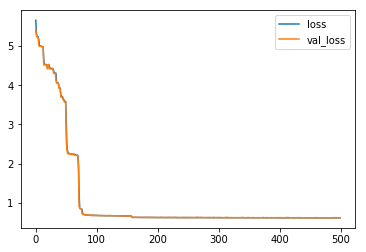

In [17]:
plt.plot(hist.history['loss'],label = 'loss')
plt.plot(hist.history['val_loss'],label = 'val_loss')
plt.legend()

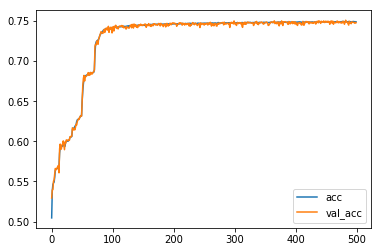

In [18]:
plt.plot(hist.history['acc'],label = 'acc')
plt.plot(hist.history['val_acc'],label = 'val_acc')
plt.legend()

In [19]:
prediction = model.predict(X_test_scaled)

In [20]:
for i in range(len(prediction)):
    idx = np.argmax(prediction[i])
    prediction[i] = 0
    prediction[i][idx] = 1

In [21]:
prediction = np.argmax(prediction,axis = 1)

In [22]:
prediction = prediction.reshape(-1,1)

In [23]:
y_test_scaled = np.argmax(y_test_scaled,axis = 1)
y_test_scaled = y_test_scaled.reshape(-1,1)

In [24]:
np.sum(prediction == y_test_scaled)/len(prediction)

0.7474791666666667

# So accuracy on test set is 74.74%